<a href="https://colab.research.google.com/github/juanepstein99/DI_Bootcamp/blob/main/Week8/Day2/DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Daily Challenge: Exploring the World Happiness Report with Matplotlib**

Instructions

Your objective is to delve into the World Happiness Report dataset, which includes columns like 'Country', 'Year', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Healthy_Life_Expectancy', 'Freedom_to_Make_Life_Choices', 'Generosity', and 'Perceptions_of_Corruption'.



**1. Load and Inspect Data:**

2. Utilize pandas to load the World Happiness Report Dataset.
3. Examine the data to grasp its structure and contents of the year 2019.


**4. Data Preprocessing:**

5. Address missing values and adjust data types as necessary.

**6. Social Support and Happiness:**

7. Employ a Matplotlib scatter plot to investigate the relationship between Social support' and 'Score'.

**8. Regional Comparisons of GDP and Health:**

9. Create a Matplotlib subplot that compares 'GDP per Capita' and 'Healthy Life Expectancy' across different regions.
10. Use a bar plot for 'GDP per Capita' and a line plot for 'Healthy Life Expectancy' on the same axes to observe how economic strength relates to health outcomes in different regions.

(156, 9)
Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3          

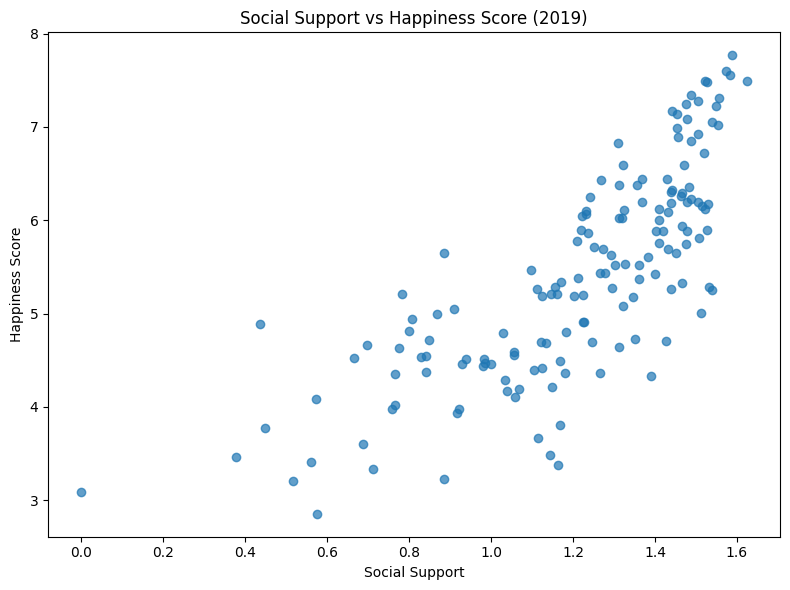

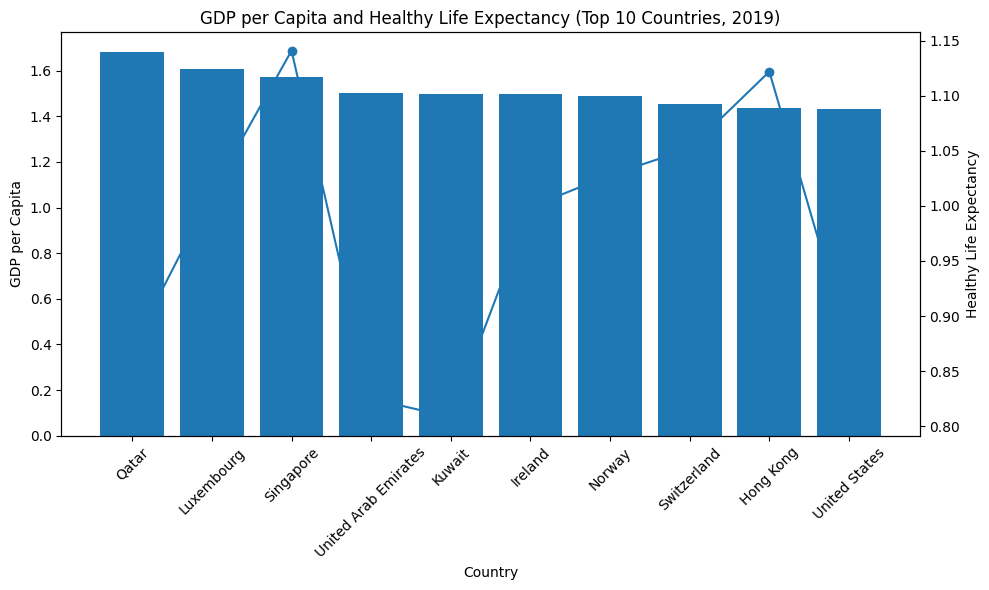

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("2019.csv")

print(df.shape)
print(df.columns)
print(df.head())

# DATA PREPROCESSING
# Rename columns to consistent names (2019 dataset format)
df = df.rename(columns={
    "Country or region": "Country",
    "Score": "Happiness_Score",
    "GDP per capita": "GDP_per_Capita",
    "Social support": "Social_Support",
    "Healthy life expectancy": "Healthy_Life_Expectancy",
    "Freedom to make life choices": "Freedom_to_Make_Life_Choices",
    "Perceptions of corruption": "Perceptions_of_Corruption"
})

# Convert numeric columns to proper numeric type
numeric_cols = [
    "Happiness_Score",
    "GDP_per_Capita",
    "Social_Support",
    "Healthy_Life_Expectancy"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Remove rows with missing values needed for analysis
df = df.dropna(subset=numeric_cols)

# SOCIAL SUPPORT AND HAPPINESS

plt.figure(figsize=(8, 6))
plt.scatter(df["Social_Support"], df["Happiness_Score"], alpha=0.7)
plt.title("Social Support vs Happiness Score (2019)")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")
plt.tight_layout()
plt.show()

# GDP AND HEALTH COMPARISON

# Regional Comparisons of GDP and Health

# Select top 10 countries by GDP per Capita
top10 = df.sort_values("GDP_per_Capita", ascending=False).head(10)

countries = top10["Country"]
gdp = top10["GDP_per_Capita"]
health = top10["Healthy_Life_Expectancy"]

# Create subplot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for GDP per Capita
ax1.bar(countries, gdp)
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP per Capita")
ax1.set_title("GDP per Capita and Healthy Life Expectancy (Top 10 Countries, 2019)")
ax1.tick_params(axis="x", rotation=45)

# Line plot for Healthy Life Expectancy
ax2 = ax1.twinx()
ax2.plot(countries, health, marker="o")
ax2.set_ylabel("Healthy Life Expectancy")

plt.tight_layout()
plt.show()

